# 1. Importación y carga de Datos


In [32]:
#Importación de librerias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

#NLP

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [2]:
!pip install inflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
np.random.seed(500)

In [6]:
#Carga de datos
df_original=pd.read_csv('/content/drive/MyDrive/BI/Proyecto 1/Data/SuicidiosProyecto.csv', sep=',', encoding = 'utf-8', index_col=0)
df_suicide = df_original.copy()

In [7]:
df_suicide.head(50)

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,suicide
336321,I kinda got behind schedule with learning for ...,non-suicide
256637,I'm just not sure anymoreFirst and foremost: I...,suicide
303772,please give me a reason to liveThats too much ...,suicide
293747,27f struggling to find meaning moving forwardI...,suicide
205651,Let’s get this bread 😎 Anyone know any good ba...,non-suicide
97174,"Day 126 of posting random ""fun"" facts everyday...",non-suicide
195945,Little brother is self mutilating. Please help...,suicide
305273,Why do women always go in groups to their wash...,non-suicide


In [8]:
#Información del DataFrame
df_suicide.describe()

,text,class
count,195700,195700
unique,195700,2
top,i want to destroy myselffor once everything wa...,non-suicide
freq,1,110165


In [9]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195700 entries, 173271 to 305170
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    195700 non-null  object
 1   class   195700 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


# 2. Preprocesamiento y preparación de datos

In [10]:
#Conversión a numérico de la etiqueta

def class_sui(text):
  if text == 'suicide':
    return 1
  else:
    return 0

df_suicide['class'] = df_suicide['class'].apply(class_sui)
df_suicide

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,1
336321,I kinda got behind schedule with learning for ...,0
256637,I'm just not sure anymoreFirst and foremost: I...,1
303772,please give me a reason to liveThats too much ...,1
293747,27f struggling to find meaning moving forwardI...,1
...,...,...
248038,Drop some cool new cereal ideas Like what woul...,0
216516,Unpopular opinion but cats deserve love and re...,0
199341,Hey guys :) How yall doin?,0


In [11]:
#Borramos duplicados
df_suicide.drop_duplicates(inplace = True)
df_suicide

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,1
336321,I kinda got behind schedule with learning for ...,0
256637,I'm just not sure anymoreFirst and foremost: I...,1
303772,please give me a reason to liveThats too much ...,1
293747,27f struggling to find meaning moving forwardI...,1
...,...,...
248038,Drop some cool new cereal ideas Like what woul...,0
216516,Unpopular opinion but cats deserve love and re...,0
199341,Hey guys :) How yall doin?,0


In [12]:
#Pasamos a minuscula
def minuscula(text):
  texto =[]
  for word in text:
    textos= word.lower()
    texto.append(textos)
  listToStr = ''.join([str(elem) for elem in texto]) 



  return listToStr  

df_suicide['text'] = df_suicide['text'].apply(minuscula)



In [13]:
#Eliminamos los números
import inflect
def numeros(text):
  x=inflect.engine()
  texto = []
  for word in text :
      word.replace(" ","")
      if word.isdigit():
         textos=x.number_to_words(word)
         texto.append(textos)
      else:
         texto.append(word)    
  return texto   
  df_suicide['text'] = df_suicide['text'].apply(numeros)

In [14]:
a=["126"]
print(numeros(a))

['one hundred and twenty-six']


In [15]:
df_suicide.head(10)

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,1
336321,i kinda got behind schedule with learning for ...,0
256637,i'm just not sure anymorefirst and foremost: i...,1
303772,please give me a reason to livethats too much ...,1
293747,27f struggling to find meaning moving forwardi...,1
205651,let’s get this bread 😎 anyone know any good ba...,0
97174,"day 126 of posting random ""fun"" facts everyday...",0
195945,little brother is self mutilating. please help...,1
305273,why do women always go in groups to their wash...,0


In [16]:
#Se generan los token para las palabras
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
list_token = []
for text in df_suicide['text']:
    # tokenize it 
    result = []
    results = tokenizer.tokenize(text)
    for word in results:
        # lemmatize it 
        words = lemmatizer.lemmatize(word)
        result.append(words)
    list_token.append(result)

In [17]:
#Lista de stopwords
count_vec = CountVectorizer(input='content', stop_words='english')
stopw = set(count_vec.get_stop_words())

In [18]:
#Eliminamos artículos, conjunciones, preposiciones, etc

for a in range(0,len(list_token)-1):
  borrables = []
  for b in range(0,len(list_token[a])-1):
    if list_token[a][b] == 'm' or list_token[a][b] == 's' or list_token[a][b] == 've' or list_token[a][b] == 'don' or list_token[a][b] == 't' or list_token[a][b] == 'd' or list_token[a][b] == 'll' or list_token[a][b] in stopw:
      borrables.append(list_token[a][b])
  for c in borrables:
    list_token[a].remove(c)

In [19]:
lst = []
for i in list_token:
    listToStr = ' '.join([str(elem) for elem in i]) 
    lst.append(listToStr)
lst[:2]

['want destroy myselffor wa starting feel okay came tumbling know used cope reason tearing skin shred swallowing pill right room wall slowly falling matter time snap finally end all',
 'kinda got schedule learning week testweek 8 test 4 ive studied 2 studied good 2 minimal 4 didnt 3 day option pull 3 nighters dont tell parent tell freak possible super hard']

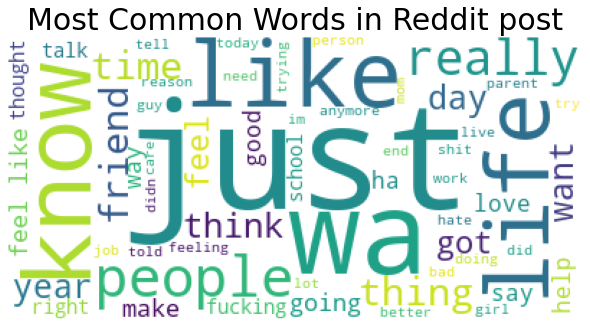

In [20]:
#Mostramos las palabras que más se repiten en el data set
word = ''
for i in lst[0:1000]: 
      
    # typecaste each val to string 
    i = str(i) 
  
    # split the value 
    tokenst = i.split() 
      
    # Converts each token into lowercase 
    
    for words in tokenst: 
        word = word + words + ' '
  
  
wordcloudt = WordCloud(
                background_color ='white', 
                stopwords = stopw, 
                min_font_size = 10).generate(word) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloudt) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Common Words in Reddit post", fontsize=30)

  
plt.show()

In [21]:
#Añadimos los datos limpios
df_suicide['final_text'] = lst

In [22]:
df_suicide.head(50)

,text,class,final_text
Unnamed: 0,,,
173271,i want to destroy myselffor once everything wa...,1,want destroy myselffor wa starting feel okay c...
336321,i kinda got behind schedule with learning for ...,0,kinda got schedule learning week testweek 8 te...
256637,i'm just not sure anymorefirst and foremost: i...,1,just sure anymorefirst foremost brazil judge s...
303772,please give me a reason to livethats too much ...,1,reason livethats dont reason live like anymore...
293747,27f struggling to find meaning moving forwardi...,1,27f struggling meaning moving forwardi admit b...
205651,let’s get this bread 😎 anyone know any good ba...,0,let bread know good bakery store
97174,"day 126 of posting random ""fun"" facts everyday...",0,day 126 posting random fun fact everyday forge...
195945,little brother is self mutilating. please help...,1,little brother self mutilating help brother 15...
305273,why do women always go in groups to their wash...,0,woman group washroom hey guy wa watching coupl...


# 3. Modelamiento

Inspirado en: https://github.com/tw1270/Web-APIs-and-Predicting-Subreddit/blob/main/Reddit.ipynb (también parte del pre-procesamiento)


## Modelamiento con Regresión Logistica con CountVectorizer

In [23]:
#Creamos una copia de los datos
df_suicide2 = df_suicide.copy()
X = df_suicide2['final_text']
y = df_suicide2['class']
#Sacamos los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [26]:
from nltk.tokenize import TweetTokenizer

#Usamos un TweetTokenizer para la tokenización del texto.
def tokeni(text):
  tt = TweetTokenizer()
  return tt.tokenize(text)

In [27]:
#Hacemos la matriz de apariciones
cv = CountVectorizer(tokenizer = tokeni, stop_words = stopw)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [28]:
#Ejecutamos el modelo de regresión logistica
lr = LogisticRegression(penalty='l2', 
                        tol=0.00001, 
                        C=1.0, 
                        fit_intercept=True, 
                        intercept_scaling=1, 
                        class_weight='balanced', 
                        random_state=1, 
                        solver='saga', 
                        max_iter=5000, 
                        n_jobs=-1)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', max_iter=5000, n_jobs=-1,
                   random_state=1, solver='saga', tol=1e-05)

In [29]:
#Hacemos la predicción con los conjuntos de entrenamiento y test
y_train_lr_predict = lr.predict(X_train)
y_test_lr_predict = lr.predict(X_test)

LR Accuracy: 87.7772%
LR Precision: 81.6772%
LR Recall: 92.8685%
LR F1 Score: 86.9141%


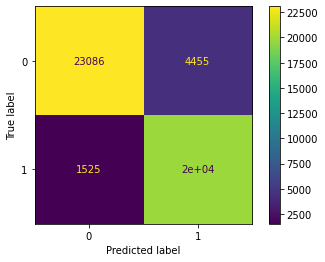

In [34]:
#Imprimimos las métricas
print(f"LR Accuracy: {accuracy_score(y_test, y_test_lr_predict):.4%}")
print(f'LR Precision: {precision_score(y_test,y_test_lr_predict):.4%}')
print(f'LR Recall: {recall_score(y_test,y_test_lr_predict):.4%}')
print(f'LR F1 Score: {f1_score(y_test, y_test_lr_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_lr_predict)

# Modelamiento con SMV y Naibe Bayes

Inspirado en:
https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34 

In [ ]:
#Divifimos los datos en entrenamiento y prueba
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_suicide['final_text'],df_suicide['class'],test_size=0.3)

In [ ]:
#Se vectorizan las palabras
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_suicide['final_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
#Vemos el vocabulario
print(Tfidf_vect.vocabulary_)

{'want': 4810, 'destroy': 1253, 'wa': 4796, 'starting': 4204, 'feel': 1715, 'okay': 3062, 'came': 725, 'know': 2523, 'used': 4716, 'cope': 1034, 'reason': 3574, 'tearing': 4410, 'skin': 4021, 'shred': 3974, 'swallowing': 4365, 'pill': 3249, 'right': 3734, 'room': 3761, 'wall': 4806, 'slowly': 4050, 'falling': 1677, 'matter': 2758, 'time': 4505, 'snap': 4072, 'finally': 1749, 'end': 1517, 'all': 254, 'kinda': 2507, 'got': 1961, 'schedule': 3832, 'learning': 2579, 'week': 4847, 'test': 4439, 'ive': 2442, 'studied': 4275, 'good': 1956, 'minimal': 2838, 'didnt': 1280, 'day': 1166, 'option': 3084, 'pull': 3473, 'dont': 1369, 'tell': 4420, 'parent': 3160, 'freak': 1841, 'possible': 3333, 'super': 4329, 'hard': 2069, 'just': 2486, 'sure': 4341, 'brazil': 640, 'judge': 2473, 'second': 3865, 'went': 4861, 'doctor': 1355, 'really': 3572, 'form': 1823, 'depression': 1230, 'think': 4470, 'care': 744, 'anymore': 301, 'thing': 4469, 'make': 2718, 'avoid': 429, 'suicide': 4319, 'fear': 1707, 'whats':

In [ ]:
#Vemos la información vectorizada
print(Train_X_Tfidf)

  (0, 4971)	0.15789190393087366
  (0, 4968)	0.12108781558886988
  (0, 4932)	0.05512505140743203
  (0, 4921)	0.08116153706346857
  (0, 4811)	0.05452334555488876
  (0, 4796)	0.3393057205079025
  (0, 4720)	0.10419022668234496
  (0, 4715)	0.06557159707644827
  (0, 4620)	0.07440055310003953
  (0, 4505)	0.03652410665941144
  (0, 4477)	0.04519778453867124
  (0, 4471)	0.05556894916367853
  (0, 4469)	0.03939649173353486
  (0, 4446)	0.09706943705694931
  (0, 4444)	0.09377269420696342
  (0, 4420)	0.10018404541092622
  (0, 4392)	0.05967736593701985
  (0, 4391)	0.07196657939048232
  (0, 4390)	0.09517490518650859
  (0, 4372)	0.09768439762557464
  (0, 4305)	0.09670475741145555
  (0, 4255)	0.09750321786603043
  (0, 4202)	0.05626633300942276
  (0, 4201)	0.11742188126874643
  (0, 4154)	0.07368519769601616
  :	:
  (136989, 2430)	0.08939135643092938
  (136989, 2253)	0.09452846976384015
  (136989, 2199)	0.12513607668396168
  (136989, 2130)	0.1548519461033701
  (136989, 2127)	0.12939593004688751
  (136989, 

In [ ]:
#Aplicamos Naive Bayes
# Se hace fit del entrenamiento en el clasificador de NB
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Predicer las etiquetas
predictions_NB = Naive.predict(Test_X_Tfidf)
# Se obtiene la precisión
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  90.62680974280362


NB Accuracy Score ->  90.62680974280362
NB Precision Score ->  92.36146366227985
NB Recall Score ->  86.95859989705126
NB f1 Score ->  89.57863838651642


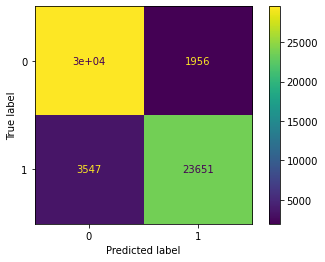

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
#Imprimimos las métricas
print("NB Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("NB Precision Score -> ", precision_score(predictions_NB, Test_Y)*100)
print("NB Recall Score -> ", recall_score(predictions_NB, Test_Y)*100)
print("NB f1 Score -> ",f1_score(predictions_NB, Test_Y)*100) 
ConfusionMatrixDisplay.from_predictions(predictions_NB, Test_Y)

In [ ]:
# Aplicamos SVM
# Se hace fit del entrenamiento en el clasificador de SMV
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# Predicer las etiquetas
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Se obtiene la precisión
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  93.33503662067791


SVM Accuracy Score ->  93.33503662067791
SVM Precision Score ->  91.23286601319953
SVM Recall Score ->  93.3359968038354
SVM f1 Score ->  92.27244899974328


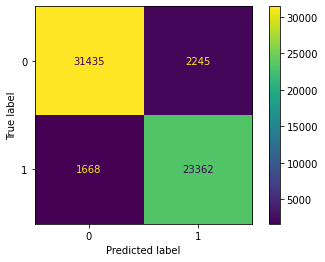

In [ ]:
#Imprimimos las métricas
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score -> ", precision_score(predictions_SVM, Test_Y)*100)
print("SVM Recall Score -> ", recall_score(predictions_SVM, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(predictions_SVM, Test_Y)*100) 
ConfusionMatrixDisplay.from_predictions(predictions_SVM, Test_Y)